**Business understanding**

The aim is to use survey data collected from an airline to predict whether a passenger will be satisfied or dissatisfied. To do this, the factors that correlate with satisfaction must be analyzed.
It is therefore a binary classification

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

**Exploratory Data Analysis**

<u>First impressions:</u>
The data set is already split into training data and test data
The target variable is 'satisfaction'
There are numeric and categorical variables.

In [64]:
df = pd.read_csv('Data\\train.csv')

In [65]:
df_test =  pd.read_csv('Data\\test.csv')

**Data structure**
I now want to examine the structure of the data more closely to find out more for the visualization, analysis of the missing data and data preparation.

In [66]:
df.shape

(103904, 25)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

The first two columns being irrelevant. I look at the dataset and a sample to verify.

In [68]:
df.sample(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
88386,88386,64581,Female,Loyal Customer,42,Business travel,Business,247,3,3,...,4,4,5,4,5,4,3,0,0.0,satisfied
30218,30218,112930,Female,Loyal Customer,45,Personal Travel,Eco,1390,1,5,...,5,5,1,5,4,5,4,23,13.0,neutral or dissatisfied
24856,24856,24885,Male,Loyal Customer,28,Business travel,Business,2226,1,1,...,5,1,5,1,5,1,5,1,0.0,satisfied
85397,85397,128132,Male,Loyal Customer,55,Personal Travel,Eco Plus,1587,2,4,...,1,3,5,3,3,5,1,0,0.0,neutral or dissatisfied
4208,4208,108009,Female,Loyal Customer,41,Business travel,Business,271,3,3,...,4,4,4,4,5,4,3,0,0.0,satisfied
80886,80886,101130,Female,Loyal Customer,54,Business travel,Business,2897,2,2,...,4,4,4,4,3,4,4,36,12.0,satisfied
39132,39132,21427,Male,disloyal Customer,27,Business travel,Eco,164,3,3,...,2,2,3,1,1,1,2,0,0.0,neutral or dissatisfied
38422,38422,45745,Female,Loyal Customer,39,Business travel,Business,3112,1,1,...,5,5,4,5,5,5,4,2,2.0,satisfied
16511,16511,11715,Male,Loyal Customer,58,Business travel,Business,1746,5,1,...,4,4,4,4,4,4,3,0,0.0,satisfied
15727,15727,80640,Male,Loyal Customer,14,Personal Travel,Eco,282,2,4,...,4,3,3,1,4,4,4,0,0.0,neutral or dissatisfied


The guess was correct. The columns must be removed afterwards during data preparation.

**Missing data**

In [69]:
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

There are 310 missing values in Arrival Delay in Minutes. However, the column behaves similarly to Departure Delay in Minutes. You could remove them, but I decided (for the purpose of the exercise) to impute them.

**Data visualization**
With the data visualization I want to determine connections that could be relevant for the data preparation. Since satisfaction is the main subject of investigation, I visualize it first.

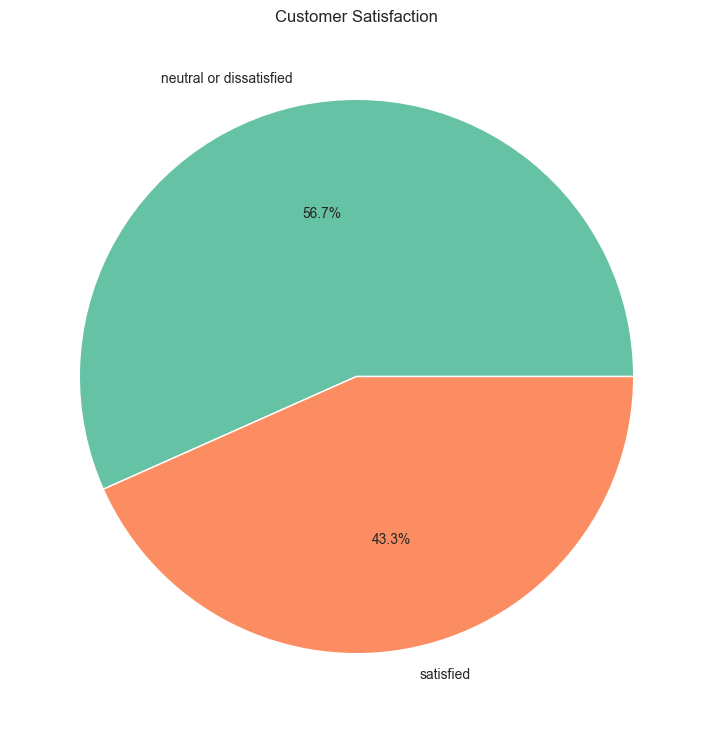

In [121]:
# amount of values in cols
value_counts = df['satisfaction'].value_counts()

labels = value_counts.index
values = value_counts.values


plt.pie(values, labels=labels, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Customer Satisfaction')
plt.show()

The distribution is almost balanced, but more passengers tended to be neutral or dissatisfied. I want to use a few more visualizations to determine which factors are associated with dissatisfaction.

To do this, I first examine the categorical data related to satisfaction.

**Categorical data visualization**

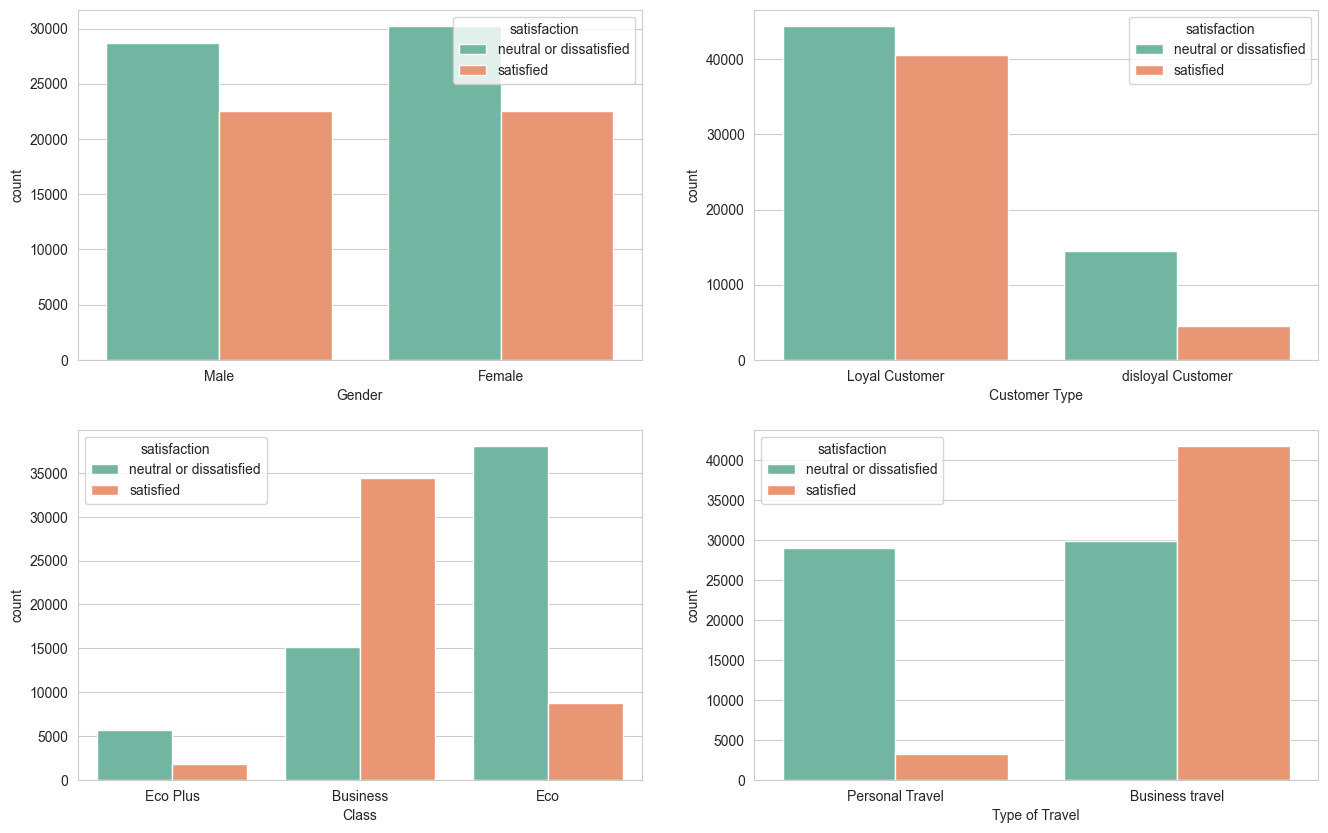

In [71]:
fig, axs = plt.subplots(2,2, figsize=(16,10))
sns.countplot(data=df, x=df['Gender'], hue='satisfaction', palette='Set2', ax=axs[0,0]);
sns.countplot(data=df, x=df['Customer Type'], hue='satisfaction', palette='Set2', ax=axs[0,1]);
sns.countplot(data=df, x=df['Class'], hue='satisfaction', palette='Set2', ax=axs[1,0]);
sns.countplot(data=df, x=df['Type of Travel'], hue='satisfaction', palette='Set2', ax=axs[1,1]);

**Key takeaways of categorical data visualization**

* The gender distribution is balanced. Gender also does not seem to play a role in satisfaction.
* Most customers are loyal customers.
    - The distribution is similar for loyal customers.
    - Disloyal customers are more likely to be dissatisfied with their trip.
* A similar observation can be made with Type of Travel. I can assume that loyal customers = business travelers
* Business class satisfaction is better. So the dissatisfaction of business travelers is not due to the class
    - Economy class has a lot of dissatisfaction. So the airline has a lot of room for improvement in economy class for infrequent travelers

**Numerical data visualization**
I have divided the numeric values into continuous and ordinal for convenience.

**Data description**

In [72]:
numerical_cols = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
df[numerical_cols].describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,14.815618,15.178678
std,15.114964,997.147281,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,843.000000,0.000000,0.000000
75%,51.000000,1743.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


The average age is 40, which probably corresponds to the business traveler group.

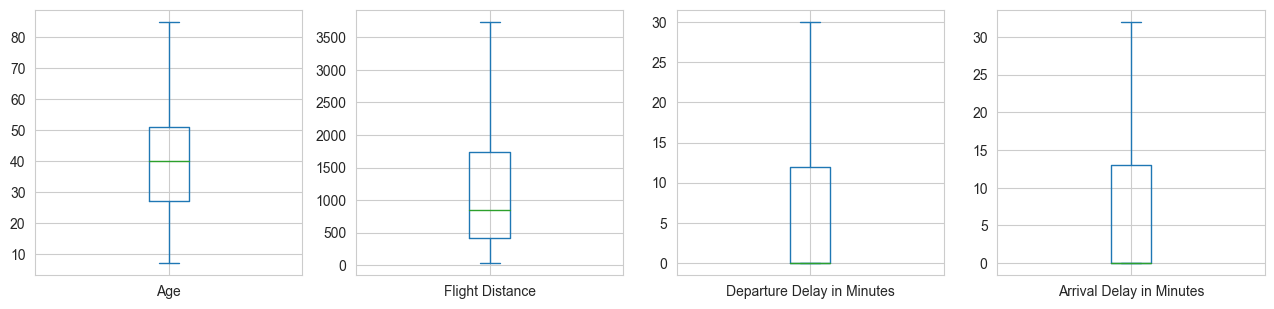

In [73]:
df[numerical_cols].plot(kind="box", subplots=True, layout=(5,5), showfliers = False, figsize=(20,20))
plt.show()

(-10.0, 240.0)

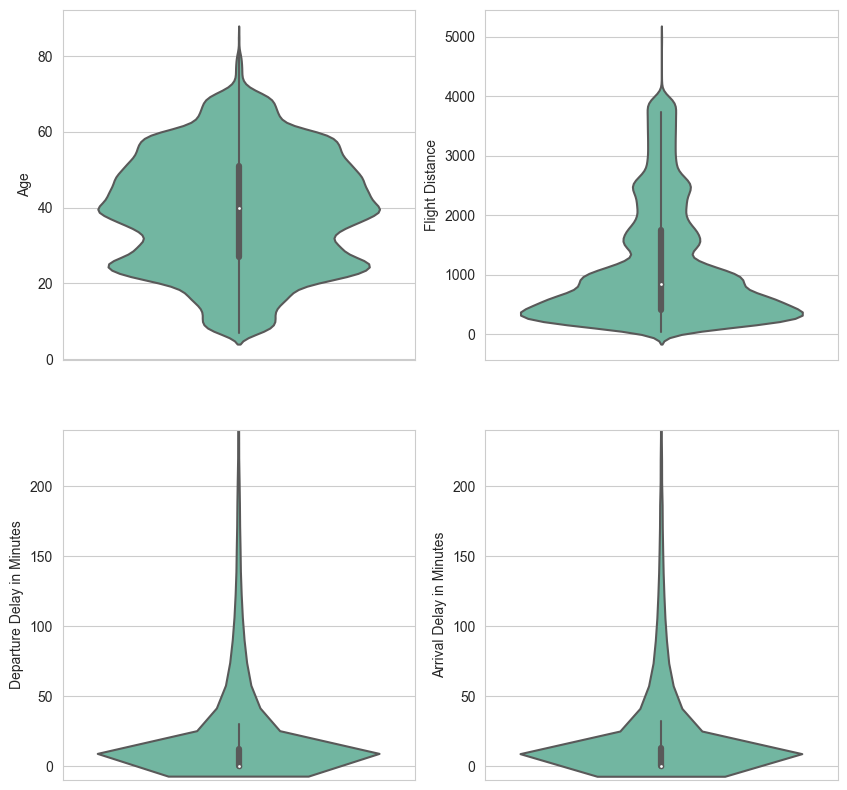

In [74]:
fig, axs = plt.subplots(2,2, figsize=(10,10))
sns.violinplot(data=df[numerical_cols], y='Age', palette='Set2', ax=axs[0,0])
sns.violinplot(data=df[numerical_cols], y='Flight Distance', palette='Set2', ax=axs[0,1])
sns.violinplot(data=df[numerical_cols], y='Departure Delay in Minutes', palette='Set2', ax=axs[1,0])
sns.violinplot(data=df[numerical_cols], y='Arrival Delay in Minutes', showfliers = False, palette='Set2', ax=axs[1,1])
axs[1,0].set_ylim(-10, 240)
axs[1,1].set_ylim(-10, 240)

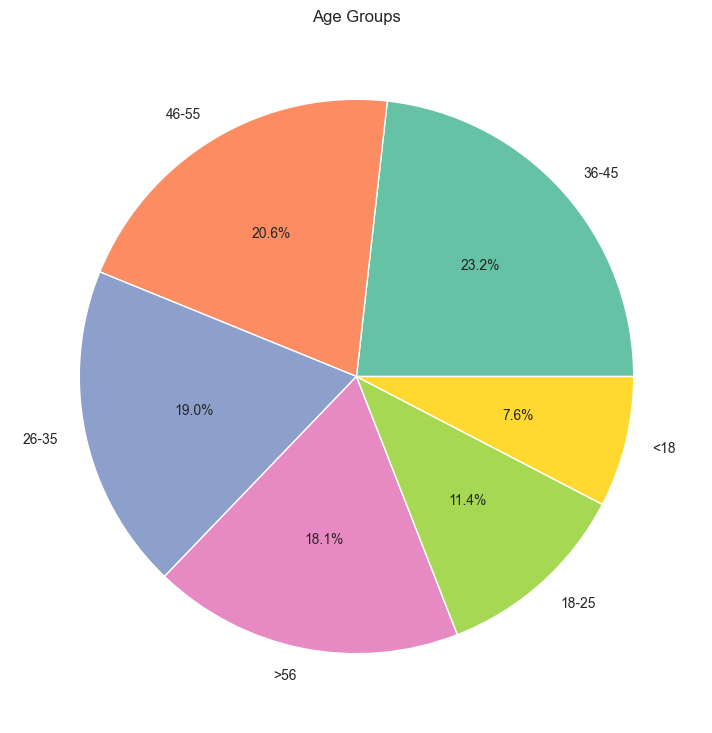

In [75]:
# Division into age groups
age_groups = ['<18','18-25', '26-35', '36-45', '46-55', '>56']

# add age group col
df['AgeGroup'] = pd.cut(df['Age'], bins=[7, 18, 25, 35, 45, 55, 150], labels=age_groups, right=False)
value_counts = df['AgeGroup'].value_counts()

labels = value_counts.index
values = value_counts.values

plt.pie(values, labels=labels, autopct='%1.1f%%',colors=sns.color_palette('Set2'))
plt.title('Age Groups')
plt.show()

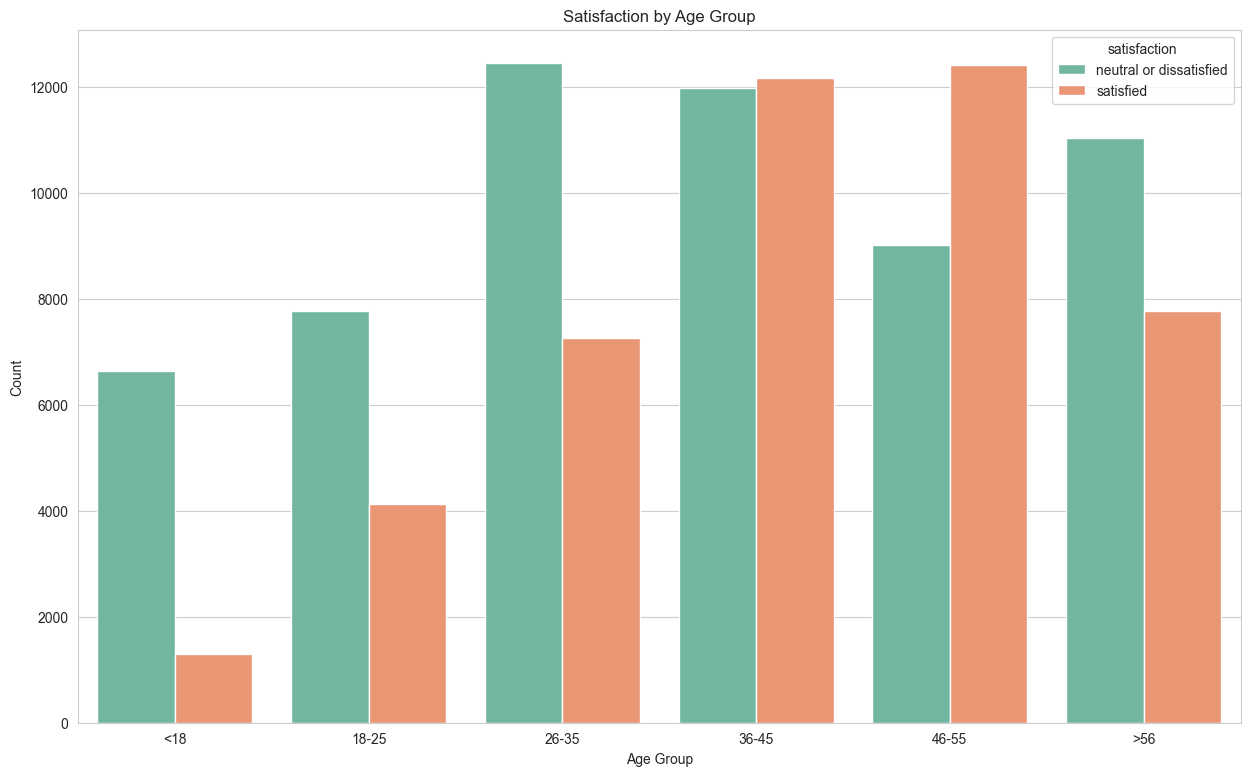

In [76]:
sns.countplot(data=df, x='AgeGroup', hue='satisfaction', palette='Set2')

plt.title('Satisfaction by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')

plt.show()

df.drop('AgeGroup', axis=1, inplace=True)

Young travelers are particularly dissatisfied. If <18 this may be due to general travel discomfort. At 18-25 and 26-35 it's probably due to other factors. However, the satisfaction of the identified business travelers is good.

<Axes: >

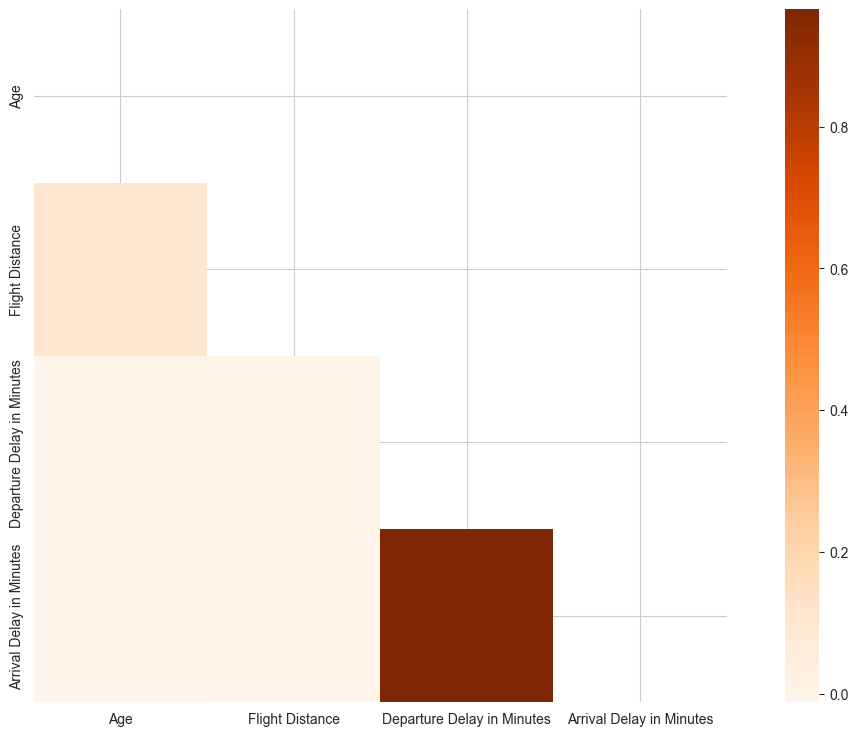

In [77]:
corr_matrix = df[numerical_cols].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, square=True, cmap='Oranges')

There is a clear correlation between departure delays and arrival delays.
This is a logical conclusion since a flight delay is usually followed by a linear arrival delay.

<Axes: xlabel='Flight Distance', ylabel='Departure Delay in Minutes'>

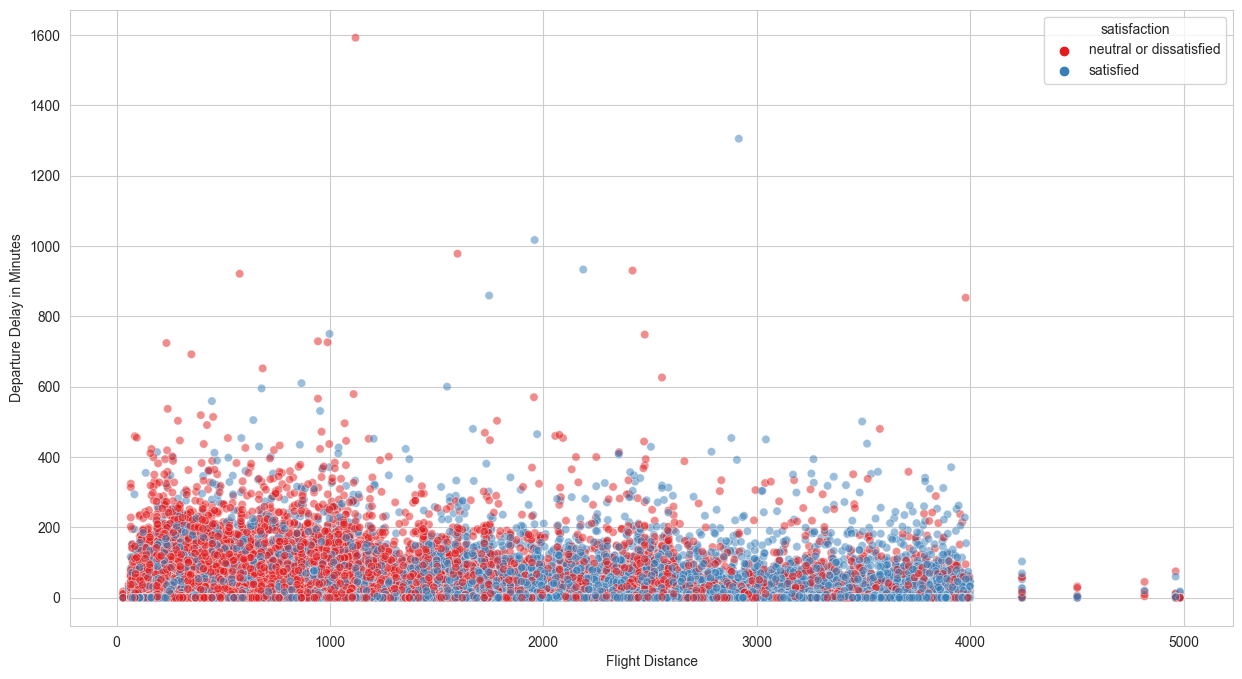

In [78]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df,x='Flight Distance',y='Departure Delay in Minutes',hue='satisfaction', alpha=0.5, palette='Set1')

<Axes: xlabel='Flight Distance', ylabel='Arrival Delay in Minutes'>

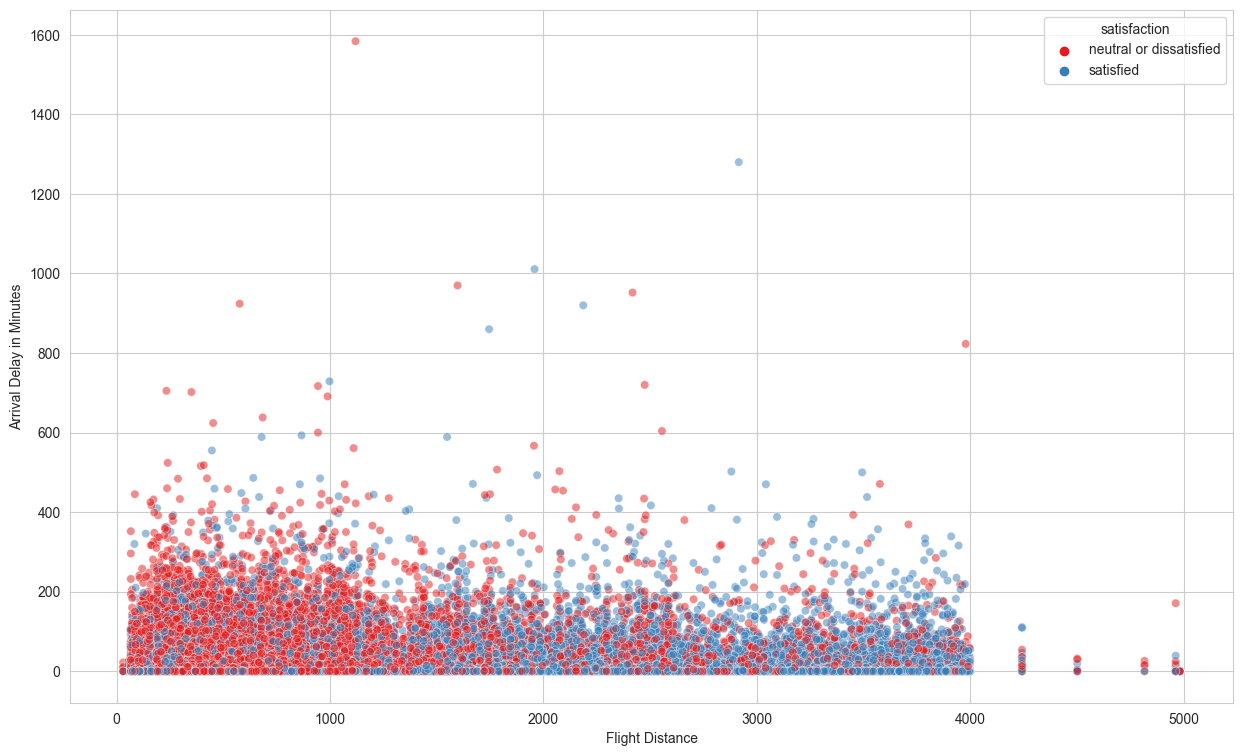

In [79]:
sns.scatterplot(data=df,x='Flight Distance',y='Arrival Delay in Minutes',hue='satisfaction', alpha=0.5, palette='Set1')

Short-haul flights tend to be dissatisfied with departure and arrival delays.

In [80]:
ordinal_cols = ['Inflight wifi service','Departure/Arrival time convenient', 'Ease of Online booking','Gate location', 'Food and drink', 'Online boarding', 'Seat comfort','Inflight entertainment', 'On-board service', 'Leg room service','Baggage handling', 'Checkin service', 'Inflight service','Cleanliness']
df[ordinal_cols].describe()

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351
std,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


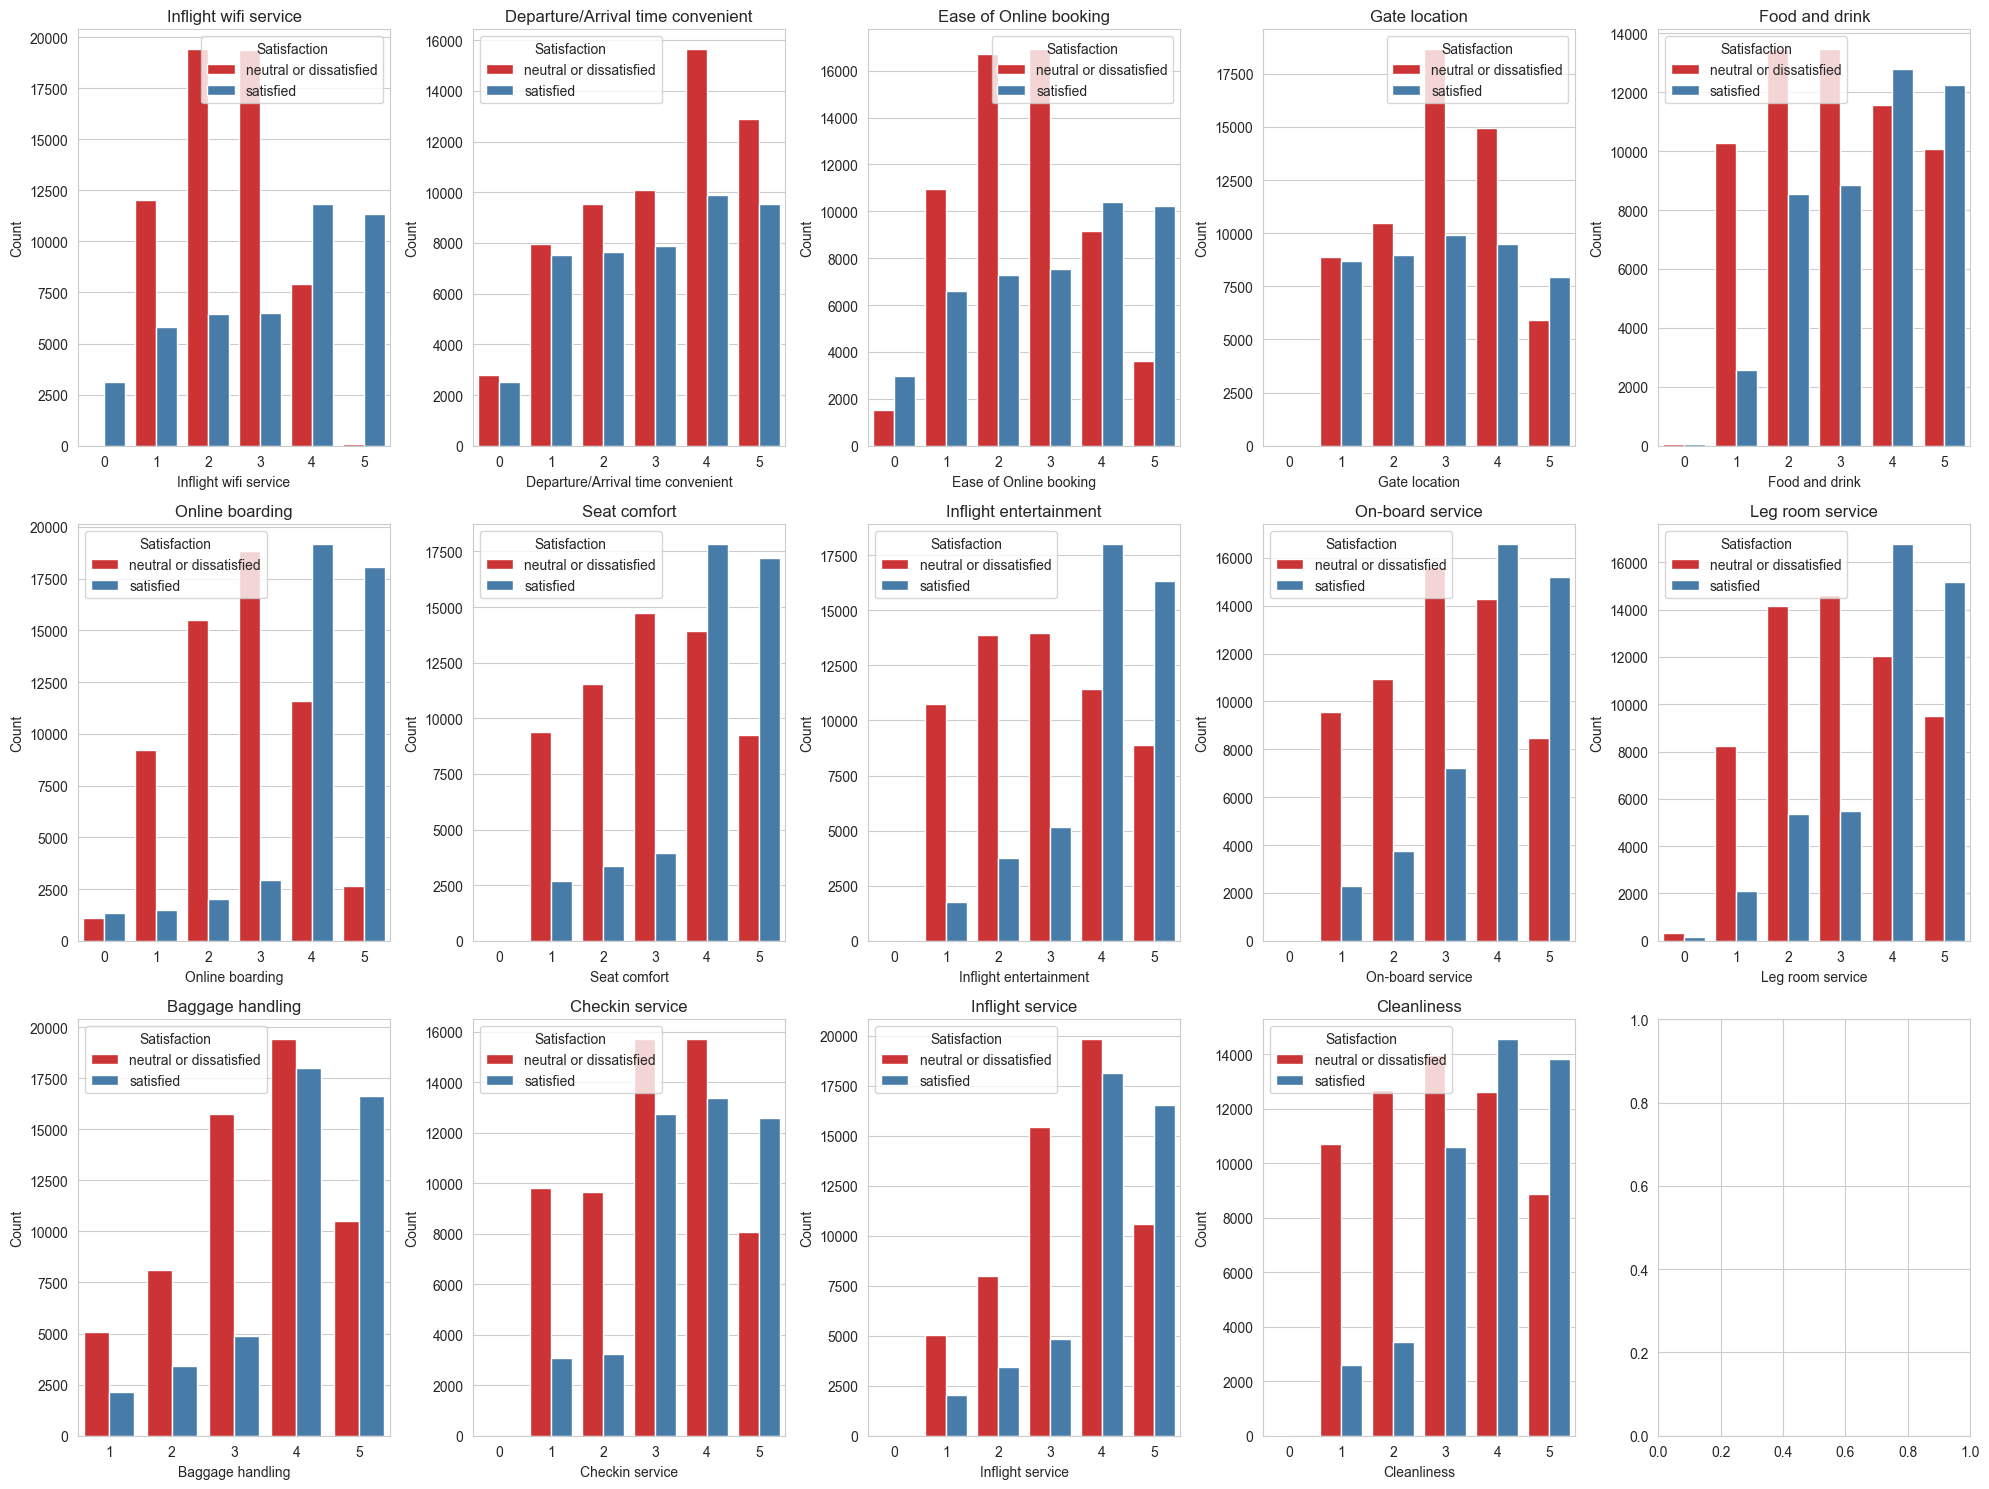

In [83]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 15))

for i in range(len(ordinal_cols)):
    row = i // 5 # row index, // = integer division
    col = i % 5 # col index, % = modulus division

    ax = axes[row, col]
    sns.countplot(x=ordinal_cols[i], hue='satisfaction', data=df, palette='Set1', ax=ax)
    ax.set_title(ordinal_cols[i])
    ax.set_xlabel(ordinal_cols[i])
    ax.set_ylabel('Count')
    ax.legend(title='Satisfaction')

plt.tight_layout()
plt.show()

**Key takeaways of numerical data visualization**

* Most customers are Duty travelers.
* Long-haul passengers more flexible about departure and arrival delays.
* Departure and Arrival Delay say the same thing.

**DATA PREPARATION**

<u>remove redundant columns</u>;
The columns Unnamed: 0 and id have no relevance for predicting satisfaction. So I remove them from the record.
I also remove the columns where I found in the visualization that they don't show much relevance.

In [84]:
columns_to_drop = ['Unnamed: 0', 'id', 'Gender', 'Departure/Arrival time convenient', 'Gate location', 'Arrival Delay in Minutes']
df.drop(columns=columns_to_drop, inplace=True)
df_test.drop(columns=columns_to_drop, inplace=True)

**Missing data**
There was missing data in Arrival Delay in Minutes. These don't matter anymore though, since I removed the entire column in the previous step.

In [85]:
# confirm
df.isnull().sum()

Customer Type                 0
Age                           0
Type of Travel                0
Class                         0
Flight Distance               0
Inflight wifi service         0
Ease of Online booking        0
Food and drink                0
Online boarding               0
Seat comfort                  0
Inflight entertainment        0
On-board service              0
Leg room service              0
Baggage handling              0
Checkin service               0
Inflight service              0
Cleanliness                   0
Departure Delay in Minutes    0
satisfaction                  0
dtype: int64

**Set target variable**
The data set was divided into train and test in advance. I have already loaded the test data set into the variable df_test.

In [86]:
# train
X_train = df.drop('satisfaction', axis=1)
y_train = df['satisfaction']

In [87]:
# test
X_test = df_test.drop('satisfaction', axis=1)
y_test = df_test['satisfaction']

**Pipeline**

In [88]:
categorical_cols = ['Customer Type', 'Type of Travel', 'Class']
numerical_cols = ['Age', 'Flight Distance', 'Departure Delay in Minutes']

ohe = OneHotEncoder(handle_unknown='ignore')
scaler = StandardScaler(with_mean=False)

In [89]:
# Define the preprocessing steps for categorical and numerical data
ct = ColumnTransformer([
        ('ohe', ohe, categorical_cols),
        ('scaler', scaler, numerical_cols) 
    ], remainder = 'passthrough')

In [90]:
# Create Pipeline
pipeline = Pipeline([('ct', ct)])
pipeline

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Customer Type',
                                                   'Type of Travel', 'Class']),
                                                 ('scaler',
                                                  StandardScaler(with_mean=False),
                                                  ['Age', 'Flight Distance',
                                                   'Departure Delay in '
                                                   'Minutes'])]))])

In [91]:
X_train_preprocessed = pipeline.fit_transform(X_train)
X_test_preprocessed = pipeline.fit_transform(X_test)

In [92]:
# check
df_preprocessed = pd.DataFrame(X_train_preprocessed)
df_preprocessed

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.860079,0.461318,0.653924,...,5.0,3.0,5.0,5.0,4.0,3.0,4.0,4.0,5.0,5.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.653998,0.235673,0.026157,...,1.0,3.0,1.0,1.0,1.0,5.0,3.0,1.0,4.0,1.0
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.720158,1.145273,0.000000,...,5.0,5.0,5.0,5.0,4.0,3.0,4.0,4.0,4.0,5.0
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.653998,0.563611,0.287727,...,2.0,2.0,2.0,2.0,2.0,5.0,3.0,1.0,4.0,2.0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,4.035755,0.214613,0.000000,...,4.0,5.0,5.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.521678,0.192550,0.078471,...,2.0,2.0,2.0,2.0,3.0,1.0,4.0,2.0,3.0,2.0
103900,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.241836,2.353726,0.000000,...,2.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0
103901,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.984798,2.000717,0.183099,...,4.0,1.0,5.0,4.0,3.0,2.0,4.0,5.0,5.0,4.0
103902,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.455518,1.002866,0.000000,...,1.0,1.0,1.0,1.0,4.0,5.0,1.0,5.0,4.0,1.0


**MODELLING
What machine learning models did you use and why?**

* **K-Nearest Neighbors (KNN):** KNN is a nonparametric classification algorithm that makes predictions based on the similarity of data points. It is appropriate for cases where the decision limit is nonlinear or the data do not have a unique distribution.
* **Decision Tree:** The decision tree is a simple and interpretable model that slices the data based on characteristics to make predictions. It is easy to understand and can capture non-linear relationships, but tends to overfit.
* **Random Forest:** Random Forest is an ensemble learning method that combines multiple decision trees to make predictions. It is robust, handles high-dimensional data well, and can capture complex interactions and nonlinear relationships.
* **Logistic Regression:** Logistic regression is a statistical model used for binary classification. It models the probability of the target variable using a logistic function. It is simple, interpretable, and works well when the relationship between the characteristics and the target variable is linear.

**How did you adjust the parameters of your data mining model and why?**
Adjusting the parameters of the data mining models is an important step in optimizing their performance. Exactly which parameters need to be adjusted depends on the model used. Here are some common approaches:

* Decision trees have parameters such as the maximum depth of the tree or the minimum number of samples required to split a node. Adjusting these parameters can prevent overfitting and ensure an optimal tree structure.
* For KNN, adjusting the number of neighbors can affect the performance of the model. I recommend trying different values and choosing the optimal number of neighbors based on cross-validation or performance metrics.
* Random Forest has parameters like number of trees and maximum depth of trees. Adjusting these parameters can help control overfitting and improve model performance.
* In logistic regression, there are typically not many hyperparameters to adjust. Regularization parameters like C or Penalty can be adjusted to control overfitting or to handle multicollinearity in the data.

**KNN**

In [93]:
knn = KNeighborsClassifier()
params = {
    'n_neighbors' : [3, 4, 5]
}

In [94]:
grid_knn = GridSearchCV(param_grid = params,scoring='accuracy', 
                        estimator=knn, cv=10, verbose=1, n_jobs=-1)
grid_knn.fit(X_train_preprocessed, y_train)
grid_knn.best_params_

Fitting 10 folds for each of 3 candidates, totalling 30 fits


{'n_neighbors': 5}

In [95]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_preprocessed, y_train)
print(knn.score(X_test_preprocessed, y_test))
y_pred = knn.predict(X_test_preprocessed)

0.93717277486911


In [96]:
print(classification_report(y_test, y_pred))

                         precision    recall  f1-score   support

neutral or dissatisfied       0.93      0.96      0.95     14573
              satisfied       0.95      0.90      0.93     11403

               accuracy                           0.94     25976
              macro avg       0.94      0.93      0.94     25976
           weighted avg       0.94      0.94      0.94     25976


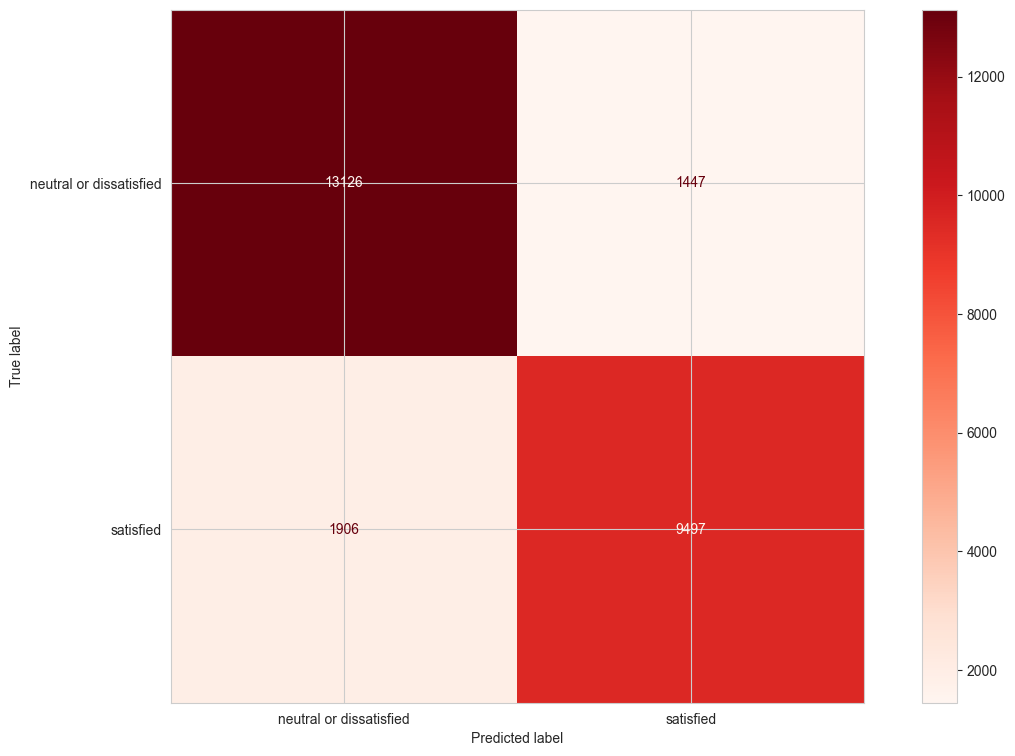

In [109]:
cmd = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Reds')

KNN returns satisfactory values.

**Decision Tree**

In [100]:
dt = DecisionTreeClassifier()
params = {
    "max_depth": range(1, 12),
    "criterion": ["gini", "entropy"]
}

In [101]:
grid_dt = GridSearchCV(param_grid=params, scoring='accuracy', 
                       estimator=dt, n_jobs=-1, cv=10, verbose=1)
grid_dt.fit(X_train_preprocessed, y_train)
grid_dt.best_params_

Fitting 10 folds for each of 22 candidates, totalling 220 fits


{'criterion': 'gini', 'max_depth': 11}

In [102]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=11,random_state=42)
dt.fit(X_train_preprocessed, y_train)
print(dt.score(X_test_preprocessed, y_test))
y_pred = dt.predict(X_test_preprocessed)

0.9512627040344934


In [103]:
print(classification_report(y_test, y_pred))

                         precision    recall  f1-score   support

neutral or dissatisfied       0.94      0.97      0.96     14573
              satisfied       0.96      0.92      0.94     11403

               accuracy                           0.95     25976
              macro avg       0.95      0.95      0.95     25976
           weighted avg       0.95      0.95      0.95     25976


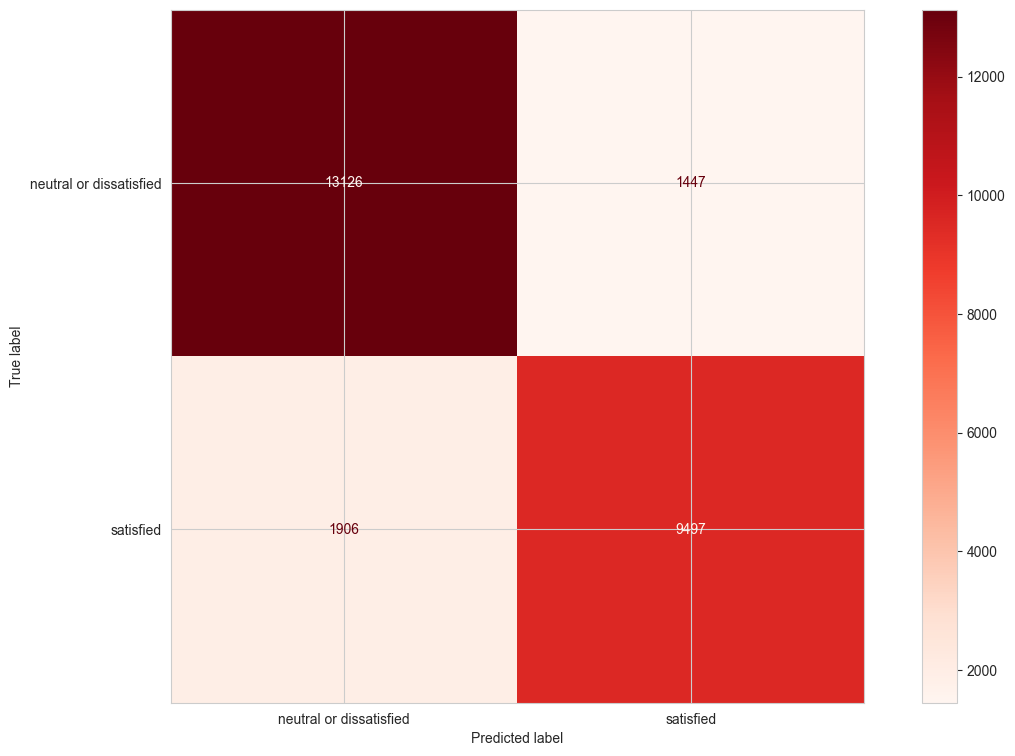

In [108]:
cmd = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Reds')

The Decision Tree is even better. The number of incorrect predictions is also lower here.

**Logistic Regression Model**

In [105]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_preprocessed, y_train)
print(logreg.score(X_test_preprocessed, y_test))
y_pred = logreg.predict(X_test_preprocessed)

0.87091931013243


In [106]:
print(classification_report(y_test, y_pred))

                         precision    recall  f1-score   support

neutral or dissatisfied       0.87      0.90      0.89     14573
              satisfied       0.87      0.83      0.85     11403

               accuracy                           0.87     25976
              macro avg       0.87      0.87      0.87     25976
           weighted avg       0.87      0.87      0.87     25976


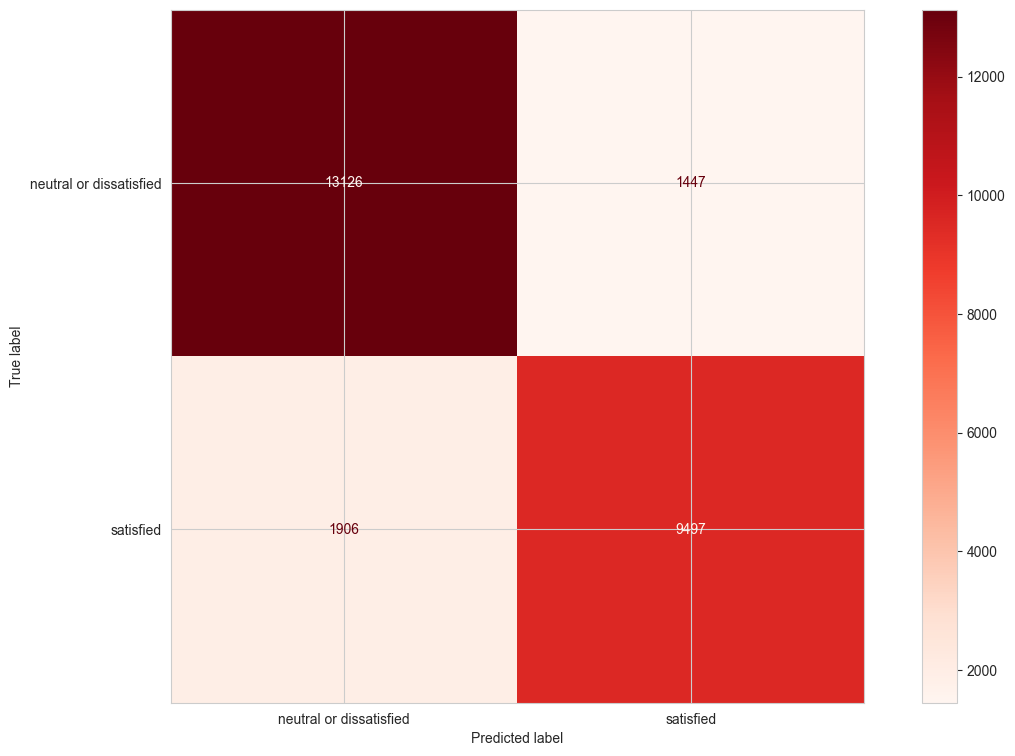

In [107]:
cmd = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Reds')

Compared to the other models, Logistic Regression is rather weak. The recognition of satisfied customers is particularly error-prone, which is why this model is not suitable.

**Random Forest**

In [111]:
rfc=RandomForestClassifier(random_state=42)
rfc.fit(X_train_preprocessed,y_train)
accuracy=rfc.score(X_test_preprocessed, y_test)
print(accuracy)

0.9625423467816446


Random Forest has the highest accuracy. So I will continue to use and evaluate this model. Of course, that’s not enough as the only metric - I’ll also consider other metrics like precision, recall, and F1 score.

**Model evaluation**

The selected models (KNN, Logistic Regression, Decision Tree and Random Forest) should work well in practice as they are all suitable for the classification task. To optimize the hyperparameters, I applied grid search to KNN and Decision Tree, trying different combinations of hyperparameter values to find the ones that give the best performance. With Logistic Regression I did without it because it was not necessary, with Random Forest as well, in addition to the excessive computing power.

**Random Forest: New Pipe + Feature Evaluation**

I create a new pipe with the ct and now transfer it directly to the RandomForestClassifier. This allows me to access the column names during feature evaluation.

In [113]:
dt_pipe = Pipeline([
    ('ct', ct),
    ('rfc', rfc)]
)
dt_pipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Customer Type',
                                                   'Type of Travel', 'Class']),
                                                 ('scaler',
                                                  StandardScaler(with_mean=False),
                                                  ['Age', 'Flight Distance',
                                                   'Departure Delay in '
                                                   'Minutes'])])),
                ('rfc', RandomForestClassifier(random_state=42))])

In [114]:
y_pred = dt_pipe.predict(X_test)
print(classification_report(y_test,y_pred))

                         precision    recall  f1-score   support

neutral or dissatisfied       0.96      0.98      0.97     14573
              satisfied       0.97      0.94      0.96     11403

               accuracy                           0.96     25976
              macro avg       0.96      0.96      0.96     25976
           weighted avg       0.96      0.96      0.96     25976


* **Precision** measures the proportion of correctly predicted positive cases among all predicted positive cases.
* **Recall** measures the proportion of correctly predicted positive cases among all actually positive cases.
* **F1-Score** is the harmonic mean of precision and recall and provides an overall assessment of model accuracy.
* **Support** indicates the number of actual occurrences of each class in the test data set.

For neutral or dissatisfied, the precision is 0.96, which means that the model correctly identified 96% of the predicted cases.
The model also correctly identified 98% of the actual positive cases.
The F1 score for this class is 0.97, so there is a good balance between precision and recall.

For the satisfied class, the values are similar to neutral or dissatisfied. Only the recall value is slightly lower, which means that the model is better at predicting true negatives.

The accuracy of the model is 96%. It can therefore be used to predict satisfaction with a relatively high level of accuracy.

Also in comparison to the classification reports of the other models, Random Forest remains at the top.

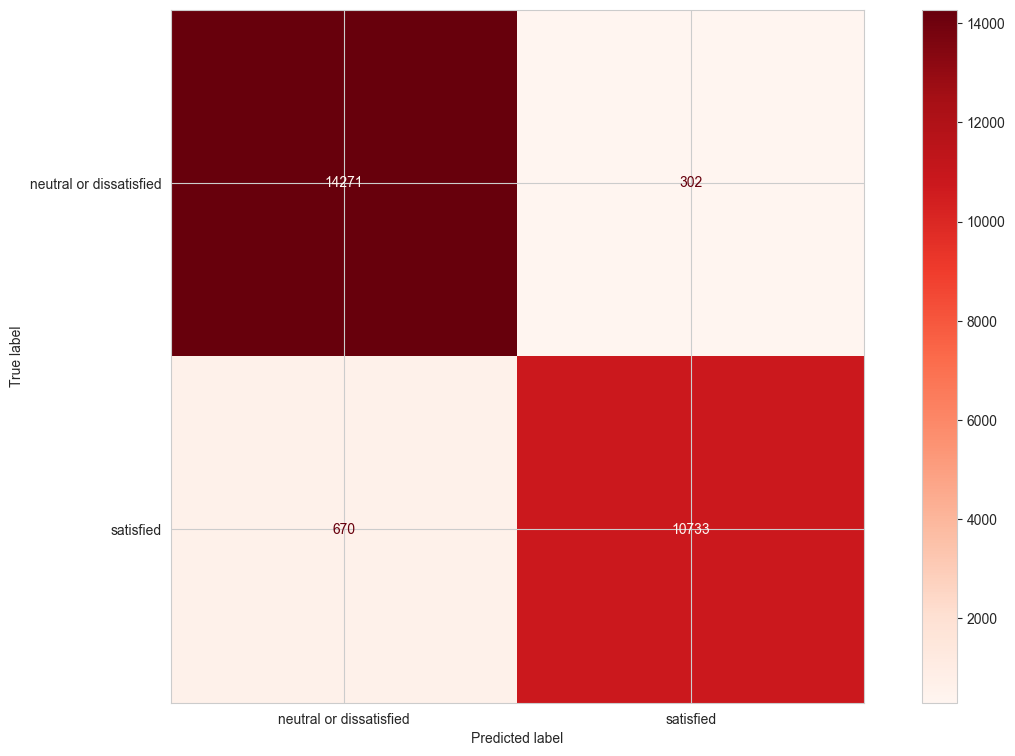

In [115]:
print(ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Reds'))

In general, it is important to minimize false positives and false negatives to accurately identify and address customer satisfaction.
By correctly identifying satisfied passengers (TP) and taking appropriate action, businesses can foster positive customer experiences, strengthen customer retention, and increase customer loyalty. Additionally, reducing false negatives ensures satisfied customers are not overlooked, resulting in better overall customer satisfaction and improved business outcomes.


Most things are correctly predicted in this model. The percentage of incorrect predictions is very low. Due to the fact that this model is about the prediction of customer satisfaction of an airline, wrong predictions e.g. not serious compared to medical applications.

**Feature Importance**

In [116]:
feature_names = dt_pipe[:-1].get_feature_names_out() # slicing to exclude classifier
feature_names

array(['ohe__Customer Type_Loyal Customer',
       'ohe__Customer Type_disloyal Customer',
       'ohe__Type of Travel_Business travel',
       'ohe__Type of Travel_Personal Travel', 'ohe__Class_Business',
       'ohe__Class_Eco', 'ohe__Class_Eco Plus', 'scaler__Age',
       'scaler__Flight Distance', 'scaler__Departure Delay in Minutes',
       'remainder__Inflight wifi service',
       'remainder__Ease of Online booking', 'remainder__Food and drink',
       'remainder__Online boarding', 'remainder__Seat comfort',
       'remainder__Inflight entertainment', 'remainder__On-board service',
       'remainder__Leg room service', 'remainder__Baggage handling',
       'remainder__Checkin service', 'remainder__Inflight service',
       'remainder__Cleanliness'], dtype=object)

In [117]:
importances = dt_pipe['rfc'].feature_importances_
feature_importances = pd.Series(
    importances, index=feature_names).sort_values(ascending=True)

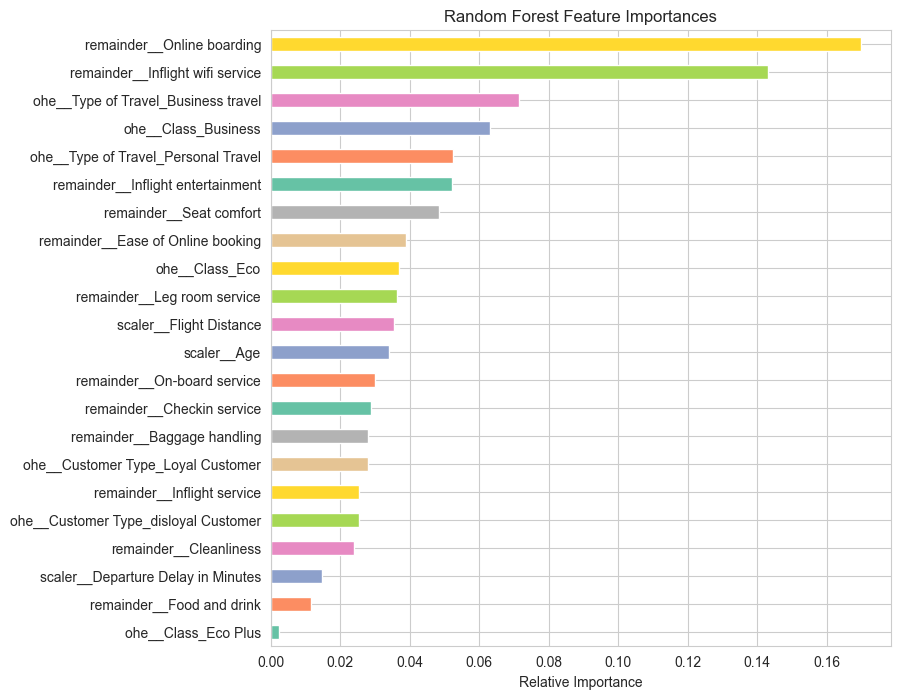

In [118]:
fig, ax = plt.subplots(figsize=(8, 8))
feature_importances.plot.barh(
    ax=ax, color=sns.color_palette('Set2'))
plt.xlabel("Relative Importance")
plt.title('Random Forest Feature Importances')
plt.show()

Similar to the visualization of the ordinal data, it can be seen here that online boarding and inflight wifi service are closely related to passenger satisfaction. Also consistent with the visualization is the meaning of the Class. Business travelers are generally happier.

**Possible business use**

The airline has positioned its strengths in serving business travelers, however, it appears to have a weakness in satisfying economy class passengers. To address the business problem and improve customer satisfaction, certain aspects of the service offering should be improved.

One approach is to focus on the needs of business travelers by optimizing key features such as onboard WiFi, online boarding and seat comfort. As business travelers depend on efficient and connected travel, improvements in these areas can further impact their experience.

Ideally, of course, not only the needs of business travelers are taken into account, but also economy class as a whole. It seems the airline may have neglected to pay attention to this area. I suspect that all of the Service Satisfaction ratings are lower there.

From a business perspective, the model serves to increase customer satisfaction and engagement. By meeting customers' needs and expectations, the airline can strengthen its competitiveness, foster customer loyalty and generate positive word of mouth. Happy customers are more likely to return and positively recommend their experience, which can ultimately lead to increased sales and long-term business success.

The model is therefore well suited to identifying the airline's weaknesses and provides starting points where improvements need to be made.